# Emotion Detection Algorithm

In [1]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import IPython.display as ipd
basedir='/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/'

2021-09-03 11:28:09.218201: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-03 11:28:09.218255: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Male Neutral

In [3]:
basedir='/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/'

In [27]:
# LOAD IN FILE
x, sr = librosa.load(basedir+'Actor_01/03-01-01-01-01-01-01.wav')

Text(0.5, 1.0, 'Waveplot - Male')

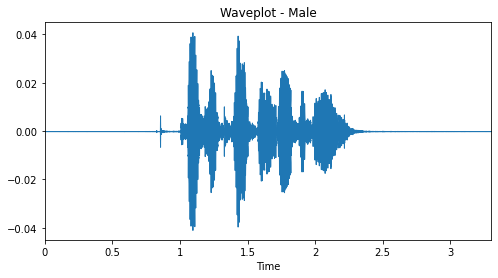

In [28]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male')


In [29]:
# PLAY AUDIO FILE
ipd.Audio(basedir+'Actor_01/03-01-01-01-01-01-01.wav')

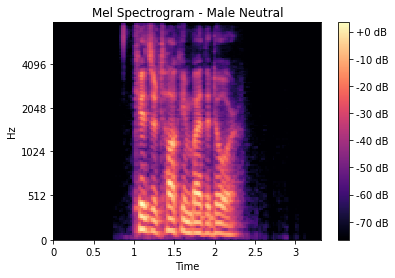

In [30]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.colorbar(format='%+2.0f dB');

In [34]:
spectrogram.shape

(128, 143)

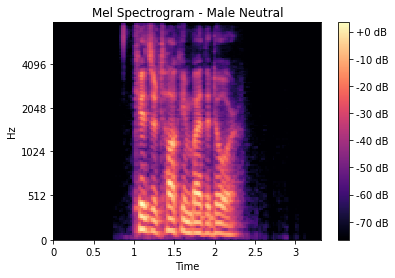

In [7]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.colorbar(format='%+2.0f dB');

## Female Calm

In [9]:
# LOAD IN FILE
x, sr = librosa.load(basedir+'Actor_02/03-01-02-01-01-01-02.wav')

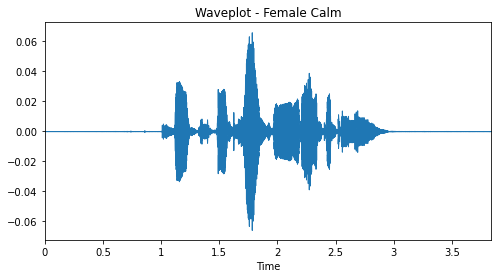

In [10]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Calm')
plt.savefig('Waveplot_FemaleCalm.png')


In [11]:
# PLAY AUDIO FILE
ipd.Audio(basedir+'Actor_02/03-01-02-01-01-01-02.wav')

(128, 143)


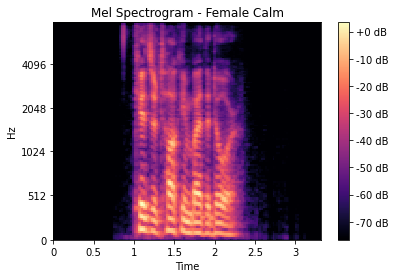

In [44]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
print(spectrogram.shape)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Calm')
plt.savefig('MelSpec_FemaleCalm.png')
plt.colorbar(format='%+2.0f dB');

## Male Happy

In [13]:
# LOAD FILE
x, sr = librosa.load(basedir+'Actor_03/03-01-03-01-01-01-03.wav')

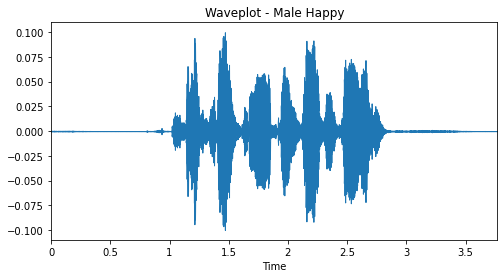

In [14]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')
plt.savefig('Waveplot_MaleHappy.png')

In [15]:
# PLAY AUDIO FILE
ipd.Audio(basedir+'Actor_03/03-01-03-01-01-01-03.wav')

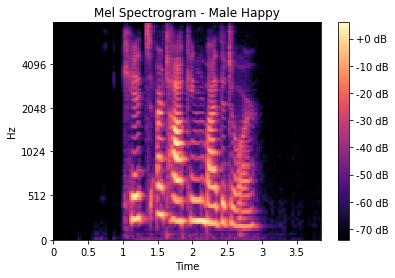

In [11]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.savefig('MelSpec_MaleHappy.png')
plt.colorbar(format='%+2.0f dB');

## Female Sad

In [12]:
# LOAD FILE
x, sr = librosa.load(basedir+'Actor_04/03-01-04-01-01-01-04.wav')


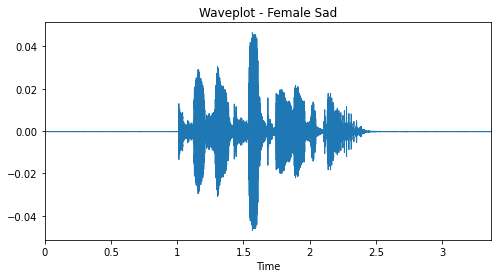

In [13]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Sad')
plt.savefig('Waveplot_FemaleSad.png')

In [28]:
# PLAY AUDIO FILE
ipd.Audio(basedir+'Actor_04/03-01-04-01-01-01-04.wav')

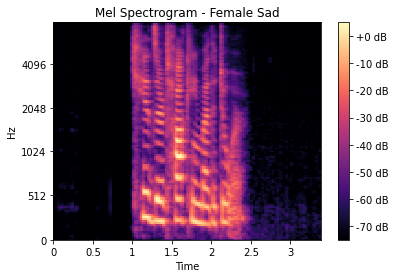

In [14]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Sad');
plt.savefig('MelSpec_FemaleSad.png')
plt.colorbar(format='%+2.0f dB');

## Male Angry

In [15]:
# LOAD FILE
x, sr = librosa.load(basedir+'Actor_05/03-01-05-01-01-01-05.wav')


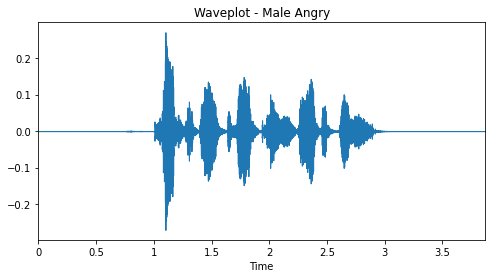

In [16]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')
plt.savefig('Waveplot_MaleAngry.png')

In [16]:
# PLAY AUDIO FILE
ipd.Audio(basedir+'Actor_05/03-01-05-01-01-01-05.wav')

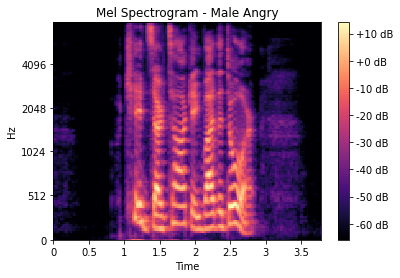

In [17]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.savefig('MelSpec_MaleAngry.png')
plt.colorbar(format='%+2.0f dB');

## Female Fearful

In [18]:
# LOAD FILE
x, sr = librosa.load(basedir+'Actor_06/03-01-06-01-01-01-06.wav')

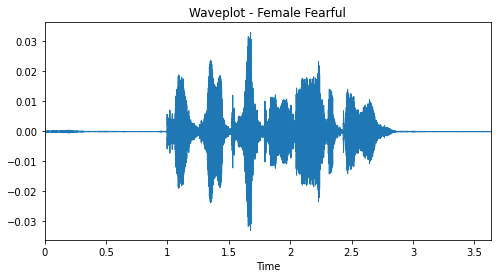

In [19]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')
plt.savefig('Waveplot_FemaleFearful.png')


In [20]:
# PLAY AUDIO FILE
ipd.Audio(basedir+'Actor_06/03-01-06-01-01-01-06.wav')

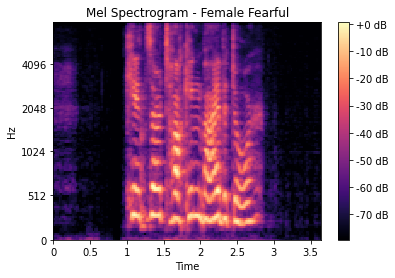

In [21]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.savefig('MelSpec_FemaleFearful.png')
plt.colorbar(format='%+2.0f dB');

## Male Disgust

In [22]:
# LOAD FILE
x, sr = librosa.load(basedir+'Actor_07/03-01-07-01-01-01-07.wav')



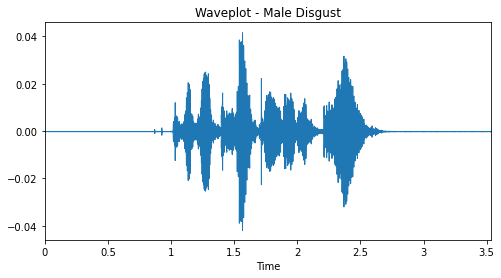

In [23]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Disgust')
plt.savefig('Waveplot_MaleDisgust.png')


In [24]:
# PLAY AUDIO FILE
ipd.Audio(basedir+'Actor_07/03-01-07-01-01-01-07.wav')

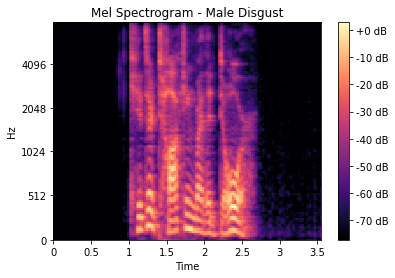

In [25]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Disgust')
plt.savefig('MelSpec_MaleDisgust.png')
plt.colorbar(format='%+2.0f dB');

## Female Surprised

In [26]:
# LOAD FILE
x, sr = librosa.load(basedir+'Actor_08/03-01-08-01-01-01-08.wav')

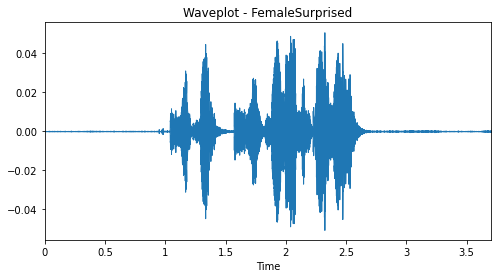

In [27]:
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')
plt.savefig('Waveplot_FemaleSurprised.png')


In [28]:
# PLAY AUDIO FILE
ipd.Audio(basedir+'Actor_08/03-01-08-01-01-01-08.wav')

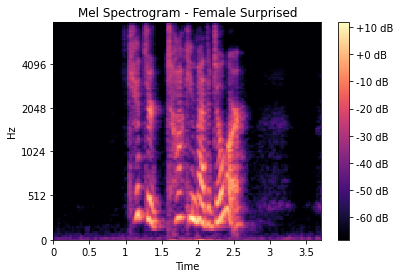

In [29]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.savefig('MelSpec_FemaleSurprised.png')
plt.colorbar(format='%+2.0f dB');

# Data Preprocessing

## Labeling Audio Files

In [2]:
# CREATE DIRECTORY OF AUDIO FILES 
basedir='/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/'
audio=basedir
actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:25]

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [3]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL -- ADD MORE LATER
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [4]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df

,gender,emotion,actor,path
0,male,neutral,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1,male,fear,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
2,male,surprise,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
3,male,angry,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
4,male,fear,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
...,...,...,...,...
1435,female,surprise,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1436,female,angry,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1437,female,surprise,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
1438,female,neutral,24,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...


In [10]:
test_df=audio_df.query('emotion=="sad" | emotion=="happy"') #each actor has 59 file

In [11]:
test_df.head()

,gender,emotion,actor,path
5,male,sad,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
7,male,sad,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
12,male,sad,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
17,male,happy,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...
20,male,sad,1,/home/ia/code/pankaj-lewagon/ser/raw_data/ravd...


In [5]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', -1)

audio_df.sample(10)

,gender,emotion,actor,path
1078,female,happy,18,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_18/03-01-03-01-02-01-18.wav
785,female,calm,14,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_14/03-01-02-02-01-02-14.wav
746,male,calm,13,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_13/03-01-02-02-01-02-13.wav
1083,male,disgust,19,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_19/03-01-07-02-01-02-19.wav
1227,male,angry,21,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_21/03-01-05-01-01-02-21.wav
456,female,surprise,8,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_08/03-01-08-02-01-01-08.wav
1366,male,calm,23,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_23/03-01-02-01-02-01-23.wav
875,male,sad,15,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_15/03-01-04-02-01-02-15.wav
1337,male,disgust,23,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_23/03-01-07-01-02-01-23.wav
277,male,fear,5,/home/ia/code/pankaj-lewagon/ser/raw_data/ravdess_data/Actor_05/03-01-06-01-02-01-05.wav


<AxesSubplot:>

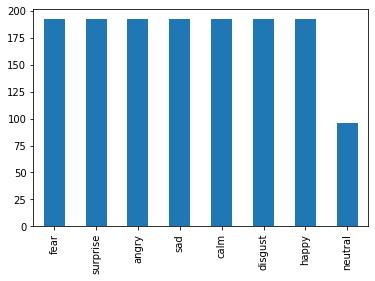

In [6]:
# LOOK AT DISTRIBUTION OF CLASSES
audio_df.emotion.value_counts().plot(kind='bar')

## Feature Extraction

In [7]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING 
#df_mfcc = pd.DataFrame(columns=['mfcc'])
#df_chroma = pd.DataFrame(columns=['chroma'])
df_mel = pd.DataFrame(columns=['mel'])
#df_temp = pd.DataFrame(columns=['temp'])
ls_mel = list()
#ls_chroma= list()
counter=0

for index,path in enumerate(audio_df.path):
    #X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)
    X, sample_rate = librosa.load(path,res_type='kaiser_fast',offset=0.5, duration=2.40)
    
    #get the mel-scaled spectrogram (transform both the y-axis (frequency) to log scale, 
    # and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    mel = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    print(mel.shape)
    #db_spec = librosa.power_to_db(mel)
    #temporally average spectrogram
    #log_mel = np.mean(db_spec, axis = 0)
        
    #Mel-frequency cepstral coefficients (MFCCs)
    #mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
    #mfcc = np.mean(mfcc,axis=0)
    
    # compute chroma energy (pertains to 12 different pitch classes)
    #chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
    #print(chroma.shape)
    #chroma = np.mean(chroma, axis = 0)
    
    #temp = librosa.feature.tempogram(y=X, sr=sample_rate)
    #temp = np.mean(temp, axis=0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at 
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)
    
    #df_mfcc.loc[counter] = [mfcc]
    #df_chroma.loc[counter] = [chroma]
    #df_mel.loc[counter] = [mel]
    #df_temp.loc[counter] = [temp]
    #ls_chroma.append(chroma)
    ls_mel.append(mel)
    #counter=counter+1   

(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)

(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)
(128, 104)

In [10]:
X = np.array(ls_mel)

In [11]:
X.shape

(1440, 128, 104)

In [12]:
ls_mel[0]

array([[1.53937996e-09, 6.65005273e-10, 8.15726653e-12, ...,
        2.04817248e-08, 1.57612305e-07, 1.87062949e-06],
       [7.98830069e-09, 2.34674813e-09, 8.74147976e-12, ...,
        1.39430654e-07, 8.63334890e-07, 2.06464210e-06],
       [7.21694260e-09, 2.22408580e-09, 9.35643056e-12, ...,
        1.17282333e-07, 7.68874884e-07, 1.06109280e-06],
       ...,
       [8.15336687e-12, 2.45025224e-12, 1.09047631e-14, ...,
        2.20185294e-11, 5.27032203e-11, 2.97713104e-11],
       [4.70820258e-12, 1.25632295e-12, 1.90017209e-15, ...,
        2.90578217e-12, 1.05634546e-11, 1.08527935e-11],
       [9.41644549e-13, 2.43212839e-13, 2.01009706e-16, ...,
        2.43985496e-13, 6.89360949e-13, 1.32954737e-12]], dtype=float32)

In [13]:
# TURN ARRAY INTO LIST AND JOIN WITH AUDIO_DF TO GET CORRESPONDING EMOTION LABELS
df_combined = pd.concat([audio_df,
                        #pd.DataFrame(df_mfcc['mfcc'].values.tolist()),
                        #pd.DataFrame(df_chroma['chroma'].values.tolist()), 
                        pd.DataFrame(df_mel['mel'].values.tolist())],axis=1)
                        #pd.DataFrame(df_temp['temp'].values.tolist())],axis=1)
df_combined = df_combined.fillna(0)

ValueError: could not broadcast input array from shape (128,115) into shape (128)

In [57]:
# DROP PATH COLUMN FOR MODELING
df_combined.drop(columns='path',inplace=True)

In [58]:
# CHECK TOP 5 ROWS
df_combined.head()

,gender,emotion,actor,0,1,2,3,4,5,6,...,196,197,198,199,200,201,202,203,204,205
0,male,neutral,1,-65.321617,-65.321617,-65.321617,-65.321617,-65.321617,-65.321617,-65.321617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,male,fear,1,-63.765957,-63.765957,-63.765957,-62.674683,-63.765957,-63.765957,-63.765957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,male,surprise,1,-64.793167,-64.793167,-64.793167,-64.793167,-64.793167,-64.793167,-64.793167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,male,angry,1,-42.431046,-43.348007,-44.169128,-44.379944,-43.950420,-43.749649,-43.946907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,male,fear,1,-45.404293,-43.974796,-43.574730,-43.847515,-44.619156,-46.071125,-44.282139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prepping Data for Modeling

In [13]:
X.shape

(1440, 128, 104)

In [14]:
from tensorflow.keras.backend import expand_dims

# $DELETE_BEGIN
X = expand_dims(X, axis=-1)

print(X.shape)

(1440, 128, 104, 1)


2021-09-03 11:35:58.753934: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-03 11:35:58.754032: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-03 11:35:58.754060: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-KI4O7NS): /proc/driver/nvidia/version does not exist
2021-09-03 11:35:58.754447: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
# $SOLUTION_BEGIN
y = to_categorical(LabelEncoder().fit_transform(audio_df.emotion.values), num_classes=8)
y.shape

(1440, 8)

In [17]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
X[0].shape

TensorShape([128, 104, 1])

In [33]:
X.shape

TensorShape([1440, 128, 104, 1])

In [89]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#def make_classifier2(optimizer=opt):
# kernel size is set 
#BUILD CNN MODEL
model = Sequential()
model.add(layers.Conv2D(64, kernel_size=(3), activation='relu', input_shape=X[0].shape))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(3),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))

model.add(Reshape((14, 704)))
model.add(layers.LSTM(units=40, activation='tanh'))
#model.add(layers.LSTM(units=20,  return_sequences = False, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 126, 102, 64)      640       
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 63, 51, 64)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 61, 49, 64)        36928     
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 30, 24, 64)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 28, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 14, 11, 64)        0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 9856)            

In [90]:
model.fit(X, y, epochs=40)

Epoch 1/40
45/45 [==============================] - 31s 640ms/step - loss: 2.2658 - accuracy: 0.2139
Epoch 2/40
45/45 [==============================] - 28s 633ms/step - loss: 1.8286 - accuracy: 0.3271
Epoch 3/40
45/45 [==============================] - 29s 652ms/step - loss: 1.7100 - accuracy: 0.3604
Epoch 4/40
45/45 [==============================] - 35s 772ms/step - loss: 1.6578 - accuracy: 0.3653
Epoch 5/40
45/45 [==============================] - 39s 876ms/step - loss: 1.6112 - accuracy: 0.3938
Epoch 6/40
45/45 [==============================] - 65s 1s/step - loss: 1.5914 - accuracy: 0.3868
Epoch 7/40
45/45 [==============================] - 68s 2s/step - loss: 1.5554 - accuracy: 0.4076
Epoch 8/40
45/45 [==============================] - 45s 1s/step - loss: 1.5326 - accuracy: 0.4167
Epoch 9/40
45/45 [==============================] - 42s 931ms/step - loss: 1.4979 - accuracy: 0.4410
Epoch 10/40
45/45 [==============================] - 49s 1s/step - loss: 1.4874 - accuracy: 0.4167
E

TypeError: float() argument must be a string or a number, not 'QuadMesh'

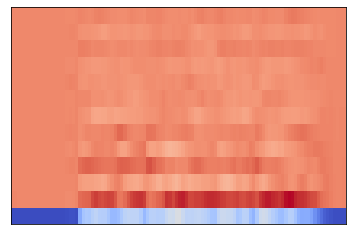

In [158]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

img=librosa.display.specshow(ls_mfcc[3])
image.array_to_img(img)
#image.img_to_array(img)
#model.predict(img)

In [119]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 11, 102, 64)       640       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 9, 100, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 12, 64)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                24608     
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 66        
Total params: 62,242
Trainable params: 62,242
Non-trainable params: 0
__________________________________________________

In [122]:
y_pred

array([[6.11903597e-05, 9.99759257e-01],
       [1.30675137e-02, 9.67599392e-01],
       [1.11843646e-02, 9.69206214e-01],
       [9.99397814e-01, 2.65625119e-03],
       [9.53766704e-03, 9.82228220e-01],
       [9.98723149e-01, 2.49192119e-03],
       [9.91481900e-01, 1.44776106e-02],
       [9.90348995e-01, 2.68822312e-02],
       [3.79955769e-03, 9.91278768e-01],
       [2.03341246e-04, 9.99309063e-01],
       [1.14422739e-02, 9.80087280e-01],
       [9.97341633e-01, 5.17839193e-03],
       [2.41279602e-02, 9.49457109e-01],
       [9.95672762e-01, 8.18738341e-03],
       [9.99951959e-01, 1.62184238e-04],
       [9.98478532e-01, 6.82818890e-03],
       [9.99994576e-01, 9.81869562e-06],
       [2.22092867e-03, 9.94198799e-01],
       [7.02634454e-03, 9.81866121e-01],
       [9.99333143e-01, 3.44389677e-03],
       [9.99041915e-01, 1.93646550e-03],
       [9.95762348e-01, 7.57461786e-03],
       [1.04567111e-02, 9.79923487e-01],
       [9.98808265e-01, 3.53643298e-03],
       [1.231935

In [67]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(X, test_size=0.2, random_state=0)

In [78]:
X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

(1152, 618)


In [79]:
X_train.head

<bound method NDFrame.head of               0          1          2          3          4          5  \
512  -66.904587 -66.904587 -66.904587 -66.904587 -66.904587 -66.904587   
482  -58.833584 -56.789543 -56.579365 -58.519688 -59.589478 -59.580261   
1050 -38.480885 -39.492290 -41.379230 -41.886616 -42.120029 -43.065323   
670  -59.752808 -58.431686 -57.629757 -58.265141 -59.817753 -59.838982   
1239 -54.379570 -54.379570 -54.379570 -54.379570 -54.379570 -54.379570   
...         ...        ...        ...        ...        ...        ...   
763  -56.322990 -56.322990 -55.447834 -54.728188 -56.045364 -56.088371   
835  -70.263039 -70.263039 -70.263039 -70.147408 -65.098465 -62.983257   
1216 -40.042763 -40.042763 -40.042763 -40.100163 -40.179184 -40.157612   
559  -47.476967 -46.498772 -47.312496 -49.871468 -50.530357 -50.333431   
684  -63.186211 -63.186211 -63.186211 -62.725689 -61.711670 -59.434837   

              6          7          8          9  ...  196  197  198  199  \
512 

In [28]:
y_train.head

NameError: name 'y_train' is not defined

In [81]:
X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(288, 618)


# Data Preprocessing

In [193]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [29]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [195]:
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(y_test[0:10])

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


In [196]:
print(lb.classes_)

['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


## Base Model

In [82]:
X_train.shape

(1152, 618)

In [83]:
y_train.shape

(1152, 1)

In [84]:
pd.DataFrame(y_train).value_counts()

emotion 
fear        160
surprise    160
sad         158
angry       157
calm        150
happy       150
disgust     145
neutral     72 
dtype: int64

In [85]:
X_test.shape

(288, 618)

In [69]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)


0.14583333333333334

In [86]:
X_test.shape

(288, 618)

In [87]:
y_test.shape

(288, 1)

In [88]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)


0.3090277777777778

In [89]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
mlp = mlp.fit(X_train,y_train)
mlp.predict(X_test)
mlp.score(X_test, y_test)

0.2673611111111111

## Initial Model

In [65]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

X_train.shape

(1152, 259, 1, 1)

In [123]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN LAYERS
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 250, 64)           704       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 241, 128)          82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 30, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 21, 128)           163968    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 128)            0

2021-08-31 19:59:13.020910: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [124]:
import tensorflow.keras as keras

# FIT MODEL AND USE CHECKPOINT TO SAVE BEST MODEL
checkpoint = ModelCheckpoint("best_initial_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='max', period=1, save_weights_only=True)

model_history=model.fit(X_train, y_train,batch_size=32, epochs=40, validation_data=(X_test, y_test),callbacks=[checkpoint])



Epoch 1/40


2021-08-31 19:59:15.707722: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


36/36 [==============================] - 1s 27ms/step - loss: 2.5026 - accuracy: 0.2205 - val_loss: 2.1818 - val_accuracy: 0.3264

Epoch 00001: val_accuracy improved from -inf to 0.32639, saving model to best_initial_model.hdf5
Epoch 2/40
36/36 [==============================] - 1s 24ms/step - loss: 2.0803 - accuracy: 0.2752 - val_loss: 1.9121 - val_accuracy: 0.3333

Epoch 00002: val_accuracy improved from 0.32639 to 0.33333, saving model to best_initial_model.hdf5
Epoch 3/40
36/36 [==============================] - 1s 24ms/step - loss: 1.8858 - accuracy: 0.2943 - val_loss: 1.8292 - val_accuracy: 0.3681

Epoch 00003: val_accuracy improved from 0.33333 to 0.36806, saving model to best_initial_model.hdf5
Epoch 4/40
36/36 [==============================] - 1s 26ms/step - loss: 1.7916 - accuracy: 0.3281 - val_loss: 1.7465 - val_accuracy: 0.3854

Epoch 00004: val_accuracy improved from 0.36806 to 0.38542, saving model to best_initial_model.hdf5
Epoch 5/40
36/36 [============================

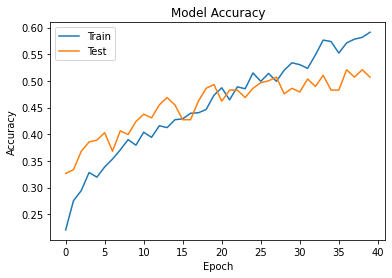

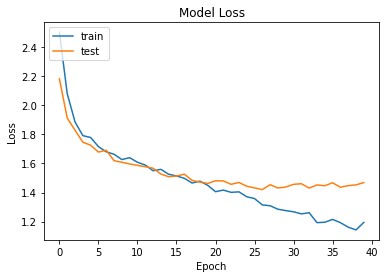

In [125]:
# PLOT MODEL HISTORY OF ACCURACY AND LOSS OVER EPOCHS
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('Initial_Model_Accuracy.png')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Initial_Model_loss.png')
plt.show()

## Post-Model Analysis

In [126]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

9/9 [==============================] - 0s 11ms/step - loss: 1.4686 - accuracy: 0.5069
Loss of the model is -  1.468572735786438
9/9 [==============================] - 0s 12ms/step - loss: 1.4686 - accuracy: 0.5069
Accuracy of the model is -  50.69444179534912 %


In [127]:
# PREDICTIONS
predictions = model.predict(X_test)
predictions=predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
predictions = pd.DataFrame({'Predicted Values': predictions})

# ACTUAL LABELS
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'Actual Values': actual})

# COMBINE BOTH 
finaldf = actual.join(predictions)
finaldf[140:150]

,Actual Values,Predicted Values
140,sad,calm
141,surprise,surprise
142,neutral,neutral
143,sad,neutral
144,fear,surprise
145,sad,sad
146,disgust,disgust
147,angry,angry
148,surprise,angry
149,angry,angry


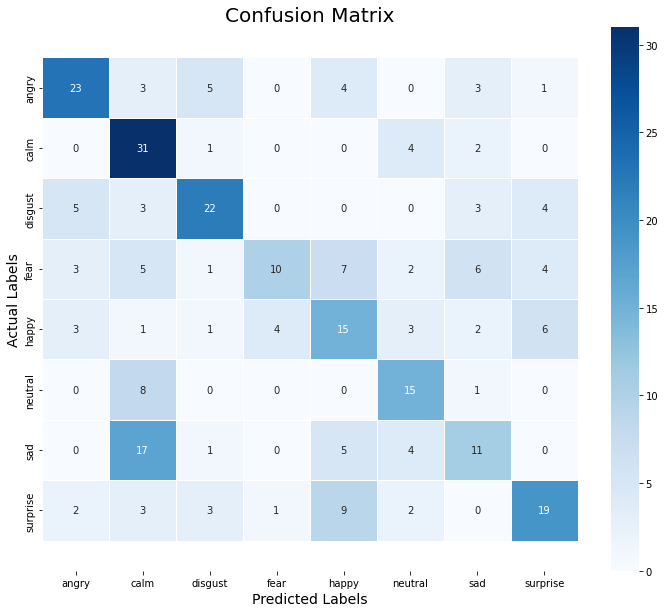

In [128]:
# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION 
cm = confusion_matrix(actual, predictions)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [129]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.64      0.59      0.61        39
        calm       0.44      0.82      0.57        38
     disgust       0.65      0.59      0.62        37
        fear       0.67      0.26      0.38        38
       happy       0.38      0.43      0.40        35
     neutral       0.50      0.62      0.56        24
         sad       0.39      0.29      0.33        38
    surprise       0.56      0.49      0.52        39

    accuracy                           0.51       288
   macro avg       0.53      0.51      0.50       288
weighted avg       0.53      0.51      0.50       288



## Hyperparameter Tuning

In [130]:
# TRAIN TEST SPLIT DATA
train,test = train_test_split(df_combined, test_size=0.2, random_state=0,
                               stratify=df_combined[['gender','actor']])

X_train = train.iloc[:, 3:]
y_train = train.iloc[:,:2].drop(columns=['gender'])
print(X_train.shape)

X_test = test.iloc[:,3:]
y_test = test.iloc[:,:2].drop(columns=['gender'])
print(X_test.shape)

(1152, 259)
(288, 259)


In [131]:
# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [132]:
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [133]:
# RESHAPE TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

In [136]:
# from keras.utils import np_utils, to_categorical

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [137]:
# CREATE FUNCTION FOR KERAS CLASSIFIER
opt = keras.optimizers.Adam(lr=0.0001)
def make_classifier(optimizer=opt):
    #BUILD CNN MODEL
    model = Sequential()
    model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=(8)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(8, activation='sigmoid'))
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model


In [138]:
y_trainHot=np.argmax(y_train, axis=1)

In [139]:
# GRID SEARCH PARAMETERS TO FIND BEST VALUES
classifier = KerasClassifier(build_fn = make_classifier)
params = {
    'batch_size': [30, 32, 34],
    'nb_epoch': [25, 50, 75],
    'optimizer':['adam','SGD']}

grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=5)

grid_search = grid_search.fit(X_train,y_trainHot)

34/34 [==============================] - 2s 39ms/step - loss: 2.8711 - accuracy: 0.1771


In [140]:
grid_search.best_params_

{'batch_size': 34, 'nb_epoch': 75, 'optimizer': 'SGD'}

In [141]:
grid_search.best_score_

0.2700244682853379